<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Loan-Prediction/blob/main/AVHLoanPredictionRFESMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA VISUALIZATION

###TRAINING DATA 

NULL VALUES CHECK UP 

In [ ]:
train.isnull().values.any()

In [ ]:
train.isnull().sum().sum()

In [ ]:
#train.fillna(0, inplace = True)
#train.isnull().values.any()
#train.isnull().sum().sum()

CLASS LABEL ANALYSIS

In [ ]:
train['class'].plot()

In [ ]:
train['class'].plot.density()

In [ ]:
train['class'].plot.bar()

In [ ]:
train['class'].plot.hist()

CLASS LABEL VALUE COUNT ANALYSIS

In [ ]:
train['class'].value_counts()

In [ ]:
train['class'].value_counts().plot.bar()

TRAINING CORRELATION MATRIX

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(train.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Glass Quality Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

In [ ]:
corr = train.corr()
ax = sns.heatmap(corr, vmin =- 1, vmax = 1, center = 0, 
                  cmap = sns.diverging_palette(20, 220, n=200),
                  square = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

###TESTING DATA 

NULL VALUES CHECK UP 

In [ ]:
test.isnull().values.any()

In [ ]:
test.isnull().sum().sum()

In [ ]:
#test.fillna(0, inplace = True)
#test.isnull().values.any()
#test.isnull().sum().sum()

TESTING CORRELATION MATRIX

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(test.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Glass Quality Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

In [ ]:
corr = test.corr()
ax = sns.heatmap(corr, vmin =- 1, vmax = 1, center = 0, 
                  cmap = sns.diverging_palette(20, 220, n=200),
                  square = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

#INSTALLING PACKAGES

In [ ]:
!pip install --upgrade keras
!pip install -q tensorflow==2.0beta1
!pip install catboost
!pip install 
!pip help install
!pip install imblearn

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
ERROR: You must give at least one requirement to install (see "pip help install")

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

Description:
  Install packages from:
  
  - PyPI (and other indexes) using requirement specifiers.
  - VCS project urls.
  - Local project directories.
  - Local or remote source archives.
  
  pip also supports installing from "requirements files", which provide
  an easy way to specify a whole environment to be installed.

Install Options:
  -r, --requirement <file>
  Install
  from the
  given requi
  rements
  file. This
  option can
  be used
  multiple
  times.
  -c, --constraint <file>
  Constrain

#IMPORTING

###LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
from matplotlib import cm as cm
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

import time
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

###MOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


###IMPORT TRAINING DATA

In [ ]:
path = "/content/drive/My Drive/LoanPrediction/train_ctrUa4K.csv"
train = pd.read_csv(path)
print(train.shape)
train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###IMPORT TESTING DATA

In [ ]:
path = "/content/drive/My Drive/LoanPrediction/test_lAUu6dG.csv"
test = pd.read_csv(path)
print(test.shape)
test.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


#TRAINING DATA PRE-PROCESSING

In [ ]:
#train.columns
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

###VALUE_COUNTS of CATEGORICAL FEATURES

In [ ]:
print(train['Gender'].value_counts(), "\n")
print(train['Married'].value_counts(), "\n")
print(train['Dependents'].value_counts(), "\n")
print(train['Education'].value_counts(), "\n")
print(train['Self_Employed'].value_counts(), "\n")
print(train['Loan_Status'].value_counts(), "\n")
print(train['Property_Area'].value_counts(), "\n")

Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 



###CATEGORIAL ENCODING

In [ ]:
#data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

train['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
train['Married'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Self_Employed'].replace(['Yes', 'No'], [1, 0], inplace=True)
train['Loan_Status'].replace(['N', 'Y'], [0, 1], inplace=True)
train['Dependents'].replace(['3+'], [3], inplace=True)
train['Education'].replace(['Graduate', 'Not Graduate'], [1, 0], inplace=True)
train['Property_Area'].replace(['Semiurban', 'Urban', 'Rural'], [0, 1, 2], inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


###CHECKING VALUE_COUNTS of CATEGORICAL FEATURES

In [ ]:
print(train['Gender'].value_counts(), "\n")
print(train['Married'].value_counts(), "\n")
print(train['Dependents'].value_counts(), "\n")
print(train['Education'].value_counts(), "\n")
print(train['Self_Employed'].value_counts(), "\n")
print(train['Loan_Status'].value_counts(), "\n")
print(train['Property_Area'].value_counts(), "\n")

0.0    489
1.0    112
Name: Gender, dtype: int64 

1.0    398
0.0    213
Name: Married, dtype: int64 

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64 

1    480
0    134
Name: Education, dtype: int64 

0.0    500
1.0     82
Name: Self_Employed, dtype: int64 

1    422
0    192
Name: Loan_Status, dtype: int64 

0    233
1    202
2    179
Name: Property_Area, dtype: int64 



###CHECKING NULL VALUES

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
from fancyimpute import KNN  

In [ ]:
train['Gender'] = KNN(k=3).fit_transform(train[['Gender']])

Imputing row 1/614 with 0 missing, elapsed time: 0.047
Imputing row 101/614 with 0 missing, elapsed time: 0.047
Imputing row 201/614 with 0 missing, elapsed time: 0.048
Imputing row 301/614 with 0 missing, elapsed time: 0.048
Imputing row 401/614 with 0 missing, elapsed time: 0.048
Imputing row 501/614 with 0 missing, elapsed time: 0.049
Imputing row 601/614 with 0 missing, elapsed time: 0.049
[KNN] Warning: 13/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['Gender'].isnull().sum()

0

In [ ]:
train['Married'] = KNN(k=3).fit_transform(train[['Married']])

Imputing row 1/614 with 0 missing, elapsed time: 0.039
Imputing row 101/614 with 0 missing, elapsed time: 0.040
Imputing row 201/614 with 0 missing, elapsed time: 0.040
Imputing row 301/614 with 0 missing, elapsed time: 0.040
Imputing row 401/614 with 0 missing, elapsed time: 0.041
Imputing row 501/614 with 0 missing, elapsed time: 0.041
Imputing row 601/614 with 0 missing, elapsed time: 0.041
[KNN] Warning: 3/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['Married'].isnull().sum()

0

In [ ]:
train['Dependents'] = KNN(k=3).fit_transform(train[['Dependents']])

Imputing row 1/614 with 0 missing, elapsed time: 0.037
Imputing row 101/614 with 0 missing, elapsed time: 0.037
Imputing row 201/614 with 0 missing, elapsed time: 0.038
Imputing row 301/614 with 0 missing, elapsed time: 0.038
Imputing row 401/614 with 0 missing, elapsed time: 0.038
Imputing row 501/614 with 0 missing, elapsed time: 0.039
Imputing row 601/614 with 0 missing, elapsed time: 0.039
[KNN] Warning: 15/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['Dependents'].isnull().sum()

0

In [ ]:
train['Self_Employed'] = KNN(k=3).fit_transform(train[['Self_Employed']])

Imputing row 1/614 with 0 missing, elapsed time: 0.033
Imputing row 101/614 with 0 missing, elapsed time: 0.033
Imputing row 201/614 with 0 missing, elapsed time: 0.033
Imputing row 301/614 with 0 missing, elapsed time: 0.034
Imputing row 401/614 with 0 missing, elapsed time: 0.034
Imputing row 501/614 with 0 missing, elapsed time: 0.035
Imputing row 601/614 with 1 missing, elapsed time: 0.036
[KNN] Warning: 32/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['Self_Employed'].isnull().sum()

0

In [ ]:
train['LoanAmount'] = KNN(k=3).fit_transform(train[['LoanAmount']])

Imputing row 1/614 with 1 missing, elapsed time: 0.051
Imputing row 101/614 with 0 missing, elapsed time: 0.052
Imputing row 201/614 with 0 missing, elapsed time: 0.052
Imputing row 301/614 with 0 missing, elapsed time: 0.052
Imputing row 401/614 with 0 missing, elapsed time: 0.053
Imputing row 501/614 with 0 missing, elapsed time: 0.053
Imputing row 601/614 with 0 missing, elapsed time: 0.053
[KNN] Warning: 22/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['LoanAmount'].isnull().sum()

0

In [ ]:
train['Loan_Amount_Term'] = KNN(k=3).fit_transform(train[['Loan_Amount_Term']])

Imputing row 1/614 with 0 missing, elapsed time: 0.036
Imputing row 101/614 with 0 missing, elapsed time: 0.037
Imputing row 201/614 with 0 missing, elapsed time: 0.037
Imputing row 301/614 with 0 missing, elapsed time: 0.037
Imputing row 401/614 with 0 missing, elapsed time: 0.038
Imputing row 501/614 with 0 missing, elapsed time: 0.038
Imputing row 601/614 with 0 missing, elapsed time: 0.039
[KNN] Warning: 14/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['Loan_Amount_Term'].isnull().sum()

0

In [ ]:
train['Credit_History'] = KNN(k=3).fit_transform(train[['Credit_History']])

Imputing row 1/614 with 0 missing, elapsed time: 0.038
Imputing row 101/614 with 0 missing, elapsed time: 0.039
Imputing row 201/614 with 0 missing, elapsed time: 0.039
Imputing row 301/614 with 0 missing, elapsed time: 0.039
Imputing row 401/614 with 0 missing, elapsed time: 0.040
Imputing row 501/614 with 0 missing, elapsed time: 0.040
Imputing row 601/614 with 1 missing, elapsed time: 0.041
[KNN] Warning: 50/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['Credit_History'].isnull().sum()

0

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#TESTING DATA PRE-PROCESSING

In [ ]:
#test.columns
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

###VALUE_COUNTS of CATEGORICAL FEATURES

In [ ]:
print(test['Gender'].value_counts(), "\n")
print(test['Married'].value_counts(), "\n")
print(test['Dependents'].value_counts(), "\n")
print(test['Education'].value_counts(), "\n")
print(test['Self_Employed'].value_counts(), "\n")
#print(test['Loan_Status'].value_counts(), "\n")
print(test['Property_Area'].value_counts(), "\n")

Male      286
Female     70
Name: Gender, dtype: int64 

Yes    233
No     134
Name: Married, dtype: int64 

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64 

Graduate        283
Not Graduate     84
Name: Education, dtype: int64 

No     307
Yes     37
Name: Self_Employed, dtype: int64 

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64 



###CATEGORIAL ENCODING

In [ ]:
#data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

test['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
test['Married'].replace(['No', 'Yes'], [0, 1], inplace=True)
test['Self_Employed'].replace(['Yes', 'No'], [1, 0], inplace=True)#
#test['Loan_Status'].replace(['N', 'Y'], [0, 1], inplace=True)
test['Dependents'].replace(['3+'], [3], inplace=True)
test['Education'].replace(['Graduate', 'Not Graduate'], [1, 0], inplace=True)
test['Property_Area'].replace(['Semiurban', 'Urban', 'Rural'], [0, 1, 2], inplace=True)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,1
1,LP001022,0.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,1
2,LP001031,0.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,1
3,LP001035,0.0,1,2,1,0.0,2340,2546,100.0,360.0,NaN,1
4,LP001051,0.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,1


###CHECKING VALUE_COUNTS of CATEGORICAL FEATURES

In [ ]:
print(test['Gender'].value_counts(), "\n")
print(test['Married'].value_counts(), "\n")
print(test['Dependents'].value_counts(), "\n")
print(test['Education'].value_counts(), "\n")
print(test['Self_Employed'].value_counts(), "\n")
#print(test['Loan_Status'].value_counts(), "\n")
print(test['Property_Area'].value_counts(), "\n")

0.0    286
1.0     70
Name: Gender, dtype: int64 

1    233
0    134
Name: Married, dtype: int64 

0    200
2     59
1     58
3     40
Name: Dependents, dtype: int64 

1    283
0     84
Name: Education, dtype: int64 

0.0    307
1.0     37
Name: Self_Employed, dtype: int64 

1    140
0    116
2    111
Name: Property_Area, dtype: int64 



###CHECKING NULL VALUES

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
from fancyimpute import KNN  

In [ ]:
test['Gender'] = KNN(k=3).fit_transform(test[['Gender']])

Imputing row 1/367 with 0 missing, elapsed time: 0.016
Imputing row 101/367 with 0 missing, elapsed time: 0.016
Imputing row 201/367 with 0 missing, elapsed time: 0.017
Imputing row 301/367 with 0 missing, elapsed time: 0.017
[KNN] Warning: 11/367 still missing after imputation, replacing with 0


In [ ]:
test.fillna('0')
test['Gender'].isnull().sum()

0

In [ ]:
test['Married'] = KNN(k=3).fit_transform(test[['Married']])

Imputing row 1/367 with 0 missing, elapsed time: 0.014
Imputing row 101/367 with 0 missing, elapsed time: 0.014
Imputing row 201/367 with 0 missing, elapsed time: 0.014
Imputing row 301/367 with 0 missing, elapsed time: 0.015


/usr/local/lib/python3.6/dist-packages/fancyimpute/solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [ ]:
test.fillna('0')
test['Married'].isnull().sum()

0

In [ ]:
test['Dependents'] = KNN(k=3).fit_transform(test[['Dependents']])

Imputing row 1/367 with 0 missing, elapsed time: 0.018
Imputing row 101/367 with 0 missing, elapsed time: 0.018
Imputing row 201/367 with 0 missing, elapsed time: 0.018
Imputing row 301/367 with 0 missing, elapsed time: 0.019
[KNN] Warning: 10/367 still missing after imputation, replacing with 0


In [ ]:
test.fillna('0')
test['Dependents'].isnull().sum()

0

In [ ]:
test['Self_Employed'] = KNN(k=3).fit_transform(test[['Self_Employed']])

Imputing row 1/367 with 0 missing, elapsed time: 0.017
Imputing row 101/367 with 0 missing, elapsed time: 0.017
Imputing row 201/367 with 0 missing, elapsed time: 0.017
Imputing row 301/367 with 0 missing, elapsed time: 0.018
[KNN] Warning: 23/367 still missing after imputation, replacing with 0


In [ ]:
test.fillna('0')
test['Self_Employed'].isnull().sum()

0

In [ ]:
test['LoanAmount'] = KNN(k=3).fit_transform(test[['LoanAmount']])

Imputing row 1/367 with 0 missing, elapsed time: 0.022
Imputing row 101/367 with 0 missing, elapsed time: 0.022
Imputing row 201/367 with 0 missing, elapsed time: 0.023
Imputing row 301/367 with 0 missing, elapsed time: 0.023
[KNN] Warning: 5/367 still missing after imputation, replacing with 0


In [ ]:
test.fillna('0')
test['LoanAmount'].isnull().sum()

0

In [ ]:
test['Loan_Amount_Term'] = KNN(k=3).fit_transform(test[['Loan_Amount_Term']])

Imputing row 1/367 with 0 missing, elapsed time: 0.017
Imputing row 101/367 with 0 missing, elapsed time: 0.018
Imputing row 201/367 with 0 missing, elapsed time: 0.018
Imputing row 301/367 with 0 missing, elapsed time: 0.018
[KNN] Warning: 6/367 still missing after imputation, replacing with 0


In [ ]:
test.fillna('0')
test['Loan_Amount_Term'].isnull().sum()

0

In [ ]:
test['Credit_History'] = KNN(k=3).fit_transform(test[['Credit_History']])

Imputing row 1/367 with 0 missing, elapsed time: 0.017
Imputing row 101/367 with 0 missing, elapsed time: 0.017
Imputing row 201/367 with 0 missing, elapsed time: 0.018
Imputing row 301/367 with 0 missing, elapsed time: 0.018
[KNN] Warning: 29/367 still missing after imputation, replacing with 0


In [ ]:
test.fillna('0')
test['Credit_History'].isnull().sum()

0

In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#DATA SPLITTING

TRAINING AND VALIDATION DATA

In [ ]:
print(train['Loan_Status'].value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64


In [ ]:
train = train.set_index('Loan_ID')
test = test.set_index('Loan_ID')
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,0.0,0.0,0.0,1,0.0,5849,0.0,0.0,360.0,1.0,1,1
LP001003,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
LP001005,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
LP001006,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
LP001008,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


In [ ]:
Y = train['Loan_Status'].values
X = train.drop('Loan_Status', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
print("X_train.shape: ",X_train.shape, "X_test.shape: ",X_test.shape,"Y_train.shape: ", Y_train.shape, "Y_test.shape: ",Y_test.shape)

X_train.shape:  (491, 11) X_test.shape:  (123, 11) Y_train.shape:  (491,) Y_test.shape:  (123,)


In [ ]:
import statsmodels.api as sm
X_Opt = np.append(arr = np.ones((X_train.shape[0], 1)), values = X_train, axis = 1)
regressor_OLS = sm.OLS(Y_train, X_Opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     12.98
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           1.08e-21
Time:                        15:10:46   Log-Likelihood:                -255.61
No. Observations:                 491   AIC:                             535.2
Df Residuals:                     479   BIC:                             585.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2324      0.100      2.323      0.0

In [ ]:
smt = SMOTE()
X_train, Y_train = smt.fit_sample(X_train, Y_train)
print(np.bincount(Y_train))

[337 337]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


TESTING DATA

In [ ]:
XTest = test
XTest.shape

(367, 11)

In [ ]:
import statsmodels.api as sm
X_Opt = np.append(arr = np.ones((X_test.shape[0], 1)), values = X_test, axis = 1)
regressor_OLS = sm.OLS(Y_test, X_Opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3.029
Date:                Tue, 09 Jun 2020   Prob (F-statistic):            0.00143
Time:                        15:12:25   Log-Likelihood:                -63.424
No. Observations:                 123   AIC:                             150.8
Df Residuals:                     111   BIC:                             184.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8675      0.240      3.615      0.0

#MODELLING

###ENSEMBLE MODELLING USING CROSS VALIDATION

In [ ]:
models_list = []
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('SVM', SVC(C=1.7, kernel='rbf'))) 
models_list.append(('NB', GaussianNB()))
models_list.append(('DT', DecisionTreeClassifier(criterion='entropy')))
models_list.append(('BAG', BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)))
models_list.append(('ET', ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2)))
models_list.append(('RF', RandomForestClassifier(criterion='entropy')))
models_list.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)))
models_list.append(('XGB', XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)))
models_list.append(('ADB', AdaBoostClassifier()))
models_list.append(('CATB', CatBoostClassifier()))

ACCURACY = {}
EVALUATION = {}

In [ ]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6625947	total: 16.6ms	remaining: 2.35s
7:	learn: 0.6586379	total: 19.1ms	remaining: 2.37s
8:	learn: 0.6539685	total: 21.4ms	remaining: 2.36s
9:	learn: 0.6496659	total: 24.5ms	remaining: 2.42s
10:	learn: 0.6454286	total: 27.4ms	remaining: 2.46s
11:	learn: 0.6420240	total: 32.1ms	remaining: 2.65s
12:	learn: 0.6386703	total: 34.5ms	remaining: 2.62s
13:	learn: 0.6348771	total: 36.8ms	remaining: 2.59s
14:	learn: 0.6316563	total: 39ms	remaining: 2.56s
15:	learn: 0.6277112	total: 41.4ms	remaining: 2.54s
16:	learn: 0.6240213	total: 43.6ms	remaining: 2.52s
17:	learn: 0.6209341	total: 45.9ms	remaining: 2.51s
18:	learn: 0.6170507	total: 48.3ms	remaining: 2.49s
19:	learn: 0.6140976	total: 53.4ms	remaining: 2.61s
20:	learn: 0.6111981	total: 57.9ms	remaining: 2.7s
21:	learn: 0.6075874	total: 60.8ms	remaining: 2.7s
22:	learn: 0.6042543	total: 63.5ms	remaining: 2.7s
23:	learn: 0.6002294	total: 66ms	remaining: 2.68s
24:	learn: 0.5974243	tot

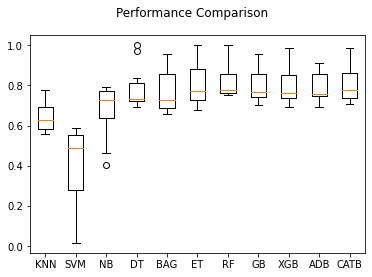

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

PIPELINING

In [ ]:
# Standardize the dataset
pipelines = []

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(C=1.7, kernel='rbf'))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier(criterion='entropy'))])))
pipelines.append(('ScaledBAG', Pipeline([('Scaler', StandardScaler()),('BAG', BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5))])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(criterion='entropy'))])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1))])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('GB', XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75))])))
pipelines.append(('ScaledADB', Pipeline([('Scaler', StandardScaler()),('ADB', AdaBoostClassifier())])))
pipelines.append(('ScaledCATB', Pipeline([('Scaler', StandardScaler()),('CATB', CatBoostClassifier())])))

results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6625947	total: 16.6ms	remaining: 2.35s
7:	learn: 0.6586379	total: 18.9ms	remaining: 2.34s
8:	learn: 0.6539685	total: 21ms	remaining: 2.32s
9:	learn: 0.6496659	total: 23.7ms	remaining: 2.34s
10:	learn: 0.6454286	total: 25.9ms	remaining: 2.33s
11:	learn: 0.6420240	total: 28.3ms	remaining: 2.33s
12:	learn: 0.6386703	total: 30.7ms	remaining: 2.33s
13:	learn: 0.6348771	total: 33.2ms	remaining: 2.34s
14:	learn: 0.6316563	total: 35.8ms	remaining: 2.35s
15:	learn: 0.6277112	total: 38.7ms	remaining: 2.38s
16:	learn: 0.6240213	total: 41.5ms	remaining: 2.4s
17:	learn: 0.6209341	total: 44.1ms	remaining: 2.41s
18:	learn: 0.6170507	total: 46.5ms	remaining: 2.4s
19:	learn: 0.6140976	total: 48.8ms	remaining: 2.39s
20:	learn: 0.6111981	total: 51.8ms	remaining: 2.41s
21:	learn: 0.6075874	total: 54.2ms	remaining: 2.41s
22:	learn: 0.6042543	total: 56.4ms	remaining: 2.4s
23:	learn: 0.6002294	total: 58.9ms	remaining: 2.4s
24:	learn: 0.5974243	to

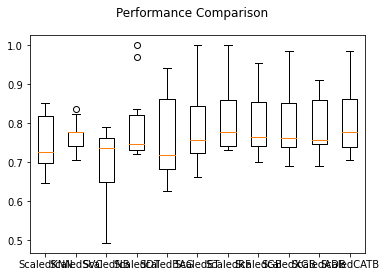

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###SVM

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.773178 using {'C': 2.0, 'kernel': 'rbf'}
0.704324 (0.109385) with: {'C': 0.1, 'kernel': 'linear'}
0.418262 (0.202827) with: {'C': 0.1, 'kernel': 'poly'}
0.692603 (0.097119) with: {'C': 0.1, 'kernel': 'rbf'}
0.699868 (0.110278) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.704324 (0.109385) with: {'C': 0.3, 'kernel': 'linear'}
0.634570 (0.172491) with: {'C': 0.3, 'kernel': 'poly'}
0.711940 (0.068512) with: {'C': 0.3, 'kernel': 'rbf'}
0.685097 (0.111261) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.704324 (0.109385) with: {'C': 0.5, 'kernel': 'linear'}
0.668723 (0.133131) with: {'C': 0.5, 'kernel': 'poly'}
0.722432 (0.052533) with: {'C': 0.5, 'kernel': 'rbf'}
0.656958 (0.105580) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.704324 (0.109385) with: {'C': 0.7, 'kernel': 'linear'}
0.689574 (0.099463) with: {'C': 0.7, 'kernel': 'poly'}
0.738872 (0.046457) with: {'C': 0.7, 'kernel': 'rbf'}
0.625834 (0.080266) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.704324 (0.109385) with: {'C': 0.9, 'kernel': 'linear'

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
SVM = SVC(C=grid_result.best_params_['C'], kernel=grid_result.best_params_['kernel'])
start = time.time()
SVM.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.022856


In [ ]:
# estimate accuracy on validation dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
SVMPred = SVM.predict(X_test_scaled)

print(confusion_matrix(Y_test, SVMPred))

[[23 15]
 [18 67]]


In [ ]:
accuracy = accuracy_score(Y_test, SVMPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, SVMPred))

Accuracy: 73.17%
              precision    recall  f1-score   support

           0       0.56      0.61      0.58        38
           1       0.82      0.79      0.80        85

    accuracy                           0.73       123
   macro avg       0.69      0.70      0.69       123
weighted avg       0.74      0.73      0.73       123



In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    XTest_scaled = scaler.transform(XTest)
SVMPred = SVM.predict(XTest_scaled)

ACCURACY['SVM'] = accuracy
EVALUATION['SVM'] = list(SVMPred)

###LinearSVC

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
LSVC = LinearSVC()
start = time.time()
LSVC.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.049761


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
LSVCPred = LSVC.predict(X_test_scaled)
LSVC.fit(X_test_scaled, Y_test)
print(confusion_matrix(Y_test, LSVCPred))

[[23 15]
 [20 65]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
accuracy = accuracy_score(Y_test, LSVCPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, LSVCPred))

Accuracy: 71.54%
              precision    recall  f1-score   support

           0       0.53      0.61      0.57        38
           1       0.81      0.76      0.79        85

    accuracy                           0.72       123
   macro avg       0.67      0.68      0.68       123
weighted avg       0.73      0.72      0.72       123



In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    XTest_scaled = scaler.transform(XTest)
LSVCPred = LSVC.predict(XTest_scaled)

ACCURACY['LinearSVC'] = accuracy
EVALUATION['LinearSVC'] = list(LSVCPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator= LinearSVC(), n_features_to_select=5)
model = LinearSVC()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.722 (0.055)


In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

0.7317073170731707


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

>2 : Features :: Accuracy : 0.732 (Time : 0.054)
>3 : Features :: Accuracy : 0.723 (Time : 0.054)
>4 : Features :: Accuracy : 0.720 (Time : 0.055)
>5 : Features :: Accuracy : 0.722 (Time : 0.059)
>6 : Features :: Accuracy : 0.713 (Time : 0.070)
>7 : Features :: Accuracy : 0.655 (Time : 0.096)
>8 : Features :: Accuracy : 0.581 (Time : 0.078)
>9 : Features :: Accuracy : 0.519 (Time : 0.038)
>10 : Features :: Accuracy : 0.507 (Time : 0.032)
>11 : Features :: Accuracy : 0.503 (Time : 0.024)
>12 : Features :: Accuracy : 0.501 (Time : 0.026)
>13 : Features :: Accuracy : 0.499 (Time : 0.025)
>14 : Features :: Accuracy : 0.500 (Time : 0.026)


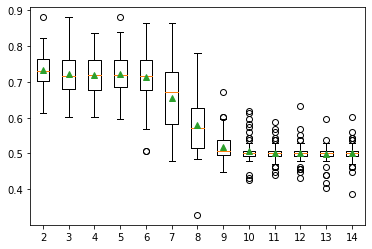

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator= LinearSVC(), n_features_to_select=i)
		model = LinearSVC()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=7, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###CALIBERATED CLASSIFIER

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
CCCV = CalibratedClassifierCV(base_estimator = LSVC)
start = time.time()
CCCV.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.197398


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
CCCVPred = CCCV.predict(X_test_scaled)
CCCV.fit(X_test_scaled, Y_test)
print(confusion_matrix(Y_test, CCCVPred))

[[23 15]
 [20 65]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
accuracy = accuracy_score(Y_test, CCCVPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, CCCVPred))

Accuracy: 71.54%
              precision    recall  f1-score   support

           0       0.53      0.61      0.57        38
           1       0.81      0.76      0.79        85

    accuracy                           0.72       123
   macro avg       0.67      0.68      0.68       123
weighted avg       0.73      0.72      0.72       123



In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    XTest_scaled = scaler.transform(XTest)
CCCVPred = CCCV.predict(XTest_scaled)

ACCURACY['CaliberatedVC'] = accuracy
EVALUATION['CaliberatedVC'] = list(CCCVPred)

###NB

In [ ]:
NB = GaussianNB()
NB.fit(X_train,Y_train)
NBPred = NB.predict(X_test)
NB.score(X_test, Y_test)
NB.fit(X_test, Y_test)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
cm = confusion_matrix(Y_test, NBPred)
print(cm)

[[20 18]
 [12 73]]


In [ ]:
accuracy = accuracy_score(Y_test, NBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, NBPred))

Accuracy: 75.61%
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        38
           1       0.80      0.86      0.83        85

    accuracy                           0.76       123
   macro avg       0.71      0.69      0.70       123
weighted avg       0.75      0.76      0.75       123



In [ ]:
NBPred = NB.predict(XTest)

ACCURACY['NB'] = accuracy
EVALUATION['NB'] = list(NBPred)

###DECISION TREE

In [ ]:
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,Y_train)
DTPred = DT.predict(X_test)
DT.score(X_test, Y_test)
DT.fit(X_test, Y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
cm = confusion_matrix(Y_test, DTPred)
print(cm)

[[16 22]
 [20 65]]


In [ ]:
accuracy = accuracy_score(Y_test, DTPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, DTPred))

Accuracy: 65.85%
              precision    recall  f1-score   support

           0       0.44      0.42      0.43        38
           1       0.75      0.76      0.76        85

    accuracy                           0.66       123
   macro avg       0.60      0.59      0.59       123
weighted avg       0.65      0.66      0.66       123



In [ ]:
DTPred = DT.predict(XTest)

ACCURACY['DT'] = accuracy
EVALUATION['DT'] = list(DTPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.760 (0.052)


In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

0.6097560975609756


>2 : Features :: Accuracy : 0.633 (Time : 0.066)
>3 : Features :: Accuracy : 0.682 (Time : 0.057)
>4 : Features :: Accuracy : 0.721 (Time : 0.053)
>5 : Features :: Accuracy : 0.760 (Time : 0.050)
>6 : Features :: Accuracy : 0.755 (Time : 0.050)
>7 : Features :: Accuracy : 0.753 (Time : 0.048)
>8 : Features :: Accuracy : 0.754 (Time : 0.051)
>9 : Features :: Accuracy : 0.756 (Time : 0.046)
>10 : Features :: Accuracy : 0.757 (Time : 0.046)
>11 : Features :: Accuracy : 0.756 (Time : 0.048)
>12 : Features :: Accuracy : 0.753 (Time : 0.051)
>13 : Features :: Accuracy : 0.756 (Time : 0.048)
>14 : Features :: Accuracy : 0.753 (Time : 0.047)


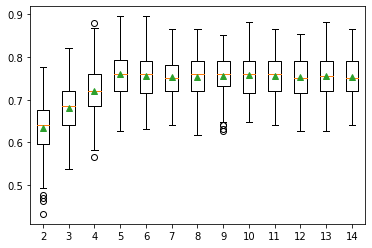

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###DECISON TREE BAGGING

In [ ]:
Bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)
Bagging.fit(X_train, Y_train)
BPred = Bagging.predict(X_test)
Bagging.score(X_test, Y_test)

0.7154471544715447

In [ ]:
cm = confusion_matrix(Y_test, BPred)
print(cm)

[[19 19]
 [16 69]]


In [ ]:
accuracy = accuracy_score(Y_test, BPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, BPred))

Accuracy: 71.54%
              precision    recall  f1-score   support

           0       0.54      0.50      0.52        38
           1       0.78      0.81      0.80        85

    accuracy                           0.72       123
   macro avg       0.66      0.66      0.66       123
weighted avg       0.71      0.72      0.71       123



In [ ]:
BPred = Bagging.predict(XTest)

ACCURACY['Bagging'] = accuracy
EVALUATION['Bagging'] = list(BPred)

###EXTRA TREE CLASSFIER

In [ ]:
ET = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
ET.fit(X_train, Y_train)
ET.score(X_train, Y_train)
ETPred = ET.predict(X_test)
ET.score(X_test, Y_test)

0.7479674796747967

In [ ]:
cm = confusion_matrix(Y_test, ETPred)
print(cm)

[[22 16]
 [15 70]]


In [ ]:
accuracy = accuracy_score(Y_test, ETPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, ETPred))

Accuracy: 74.80%
              precision    recall  f1-score   support

           0       0.59      0.58      0.59        38
           1       0.81      0.82      0.82        85

    accuracy                           0.75       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.75      0.75      0.75       123



In [ ]:
ETPred = ET.predict(XTest)

ACCURACY['ExtraTree'] = accuracy
EVALUATION['ExtraTree'] = list(ETPred)

###GRADIANT BOOSTING CLASSIFIER

In [ ]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GB.fit(X_train, Y_train)
GBPred = GB.predict(X_test)
#GB.score(X_test, Y_test)
GB.fit(X_test, Y_test)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
cm = confusion_matrix(Y_test, GBPred)
print(cm)

[[18 20]
 [17 68]]


In [ ]:
accuracy = accuracy_score(Y_test, GBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, GBPred))

Accuracy: 69.92%
              precision    recall  f1-score   support

           0       0.51      0.47      0.49        38
           1       0.77      0.80      0.79        85

    accuracy                           0.70       123
   macro avg       0.64      0.64      0.64       123
weighted avg       0.69      0.70      0.70       123



In [ ]:
GBPred = GB.predict(XTest)

ACCURACY['GB'] = accuracy
EVALUATION['GB'] = list(GBPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1), n_features_to_select=5)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.796 (0.046)


In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

0.7479674796747967


>2 : Features :: Accuracy : 0.813 (Time : 0.042)
>3 : Features :: Accuracy : 0.822 (Time : 0.041)
>4 : Features :: Accuracy : 0.809 (Time : 0.042)
>5 : Features :: Accuracy : 0.796 (Time : 0.046)
>6 : Features :: Accuracy : 0.798 (Time : 0.045)
>7 : Features :: Accuracy : 0.804 (Time : 0.044)
>8 : Features :: Accuracy : 0.806 (Time : 0.045)
>9 : Features :: Accuracy : 0.806 (Time : 0.045)
>10 : Features :: Accuracy : 0.805 (Time : 0.045)
>11 : Features :: Accuracy : 0.805 (Time : 0.046)
>12 : Features :: Accuracy : 0.805 (Time : 0.046)
>13 : Features :: Accuracy : 0.805 (Time : 0.046)
>14 : Features :: Accuracy : 0.805 (Time : 0.046)


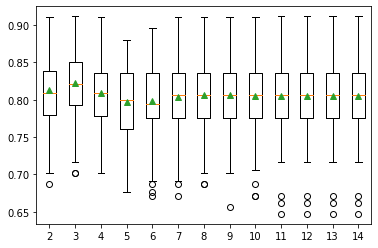

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1), n_features_to_select=i)
		model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###STOICHASTIC GRADIANT DESCENT CLASSIFIER

In [ ]:
SGDC = SGDClassifier()
SGDC.fit(X_train, Y_train)
SGDCPred = SGDC.predict(X_test)
#SGDC.score(X_test, Y_test)
SGDC.fit(X_test, Y_test)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
cm = confusion_matrix(Y_test, SGDCPred)
print(cm)

[[ 0 38]
 [ 0 85]]


In [ ]:
accuracy = accuracy_score(Y_test, SGDCPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, SGDCPred))

Accuracy: 69.11%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.69      1.00      0.82        85

    accuracy                           0.69       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.48      0.69      0.56       123



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
SGDCPred = SGDC.predict(XTest)

ACCURACY['SGDC'] = accuracy
EVALUATION['SGDC'] = list(SGDCPred)

###SGDCLASSIFIER with STANDARDSCALER and PIPELING

In [ ]:
SGD = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
SGD.fit(X_train, Y_train)
SGDPred = SGD.predict(X_test)
#SGD.score(X_test, Y_test)
SGD.fit(X_test, Y_test)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
cm = confusion_matrix(Y_test, SGDPred)
print(cm)

[[24 14]
 [37 48]]


In [ ]:
accuracy = accuracy_score(Y_test, SGDPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, SGDPred))

Accuracy: 58.54%
              precision    recall  f1-score   support

           0       0.39      0.63      0.48        38
           1       0.77      0.56      0.65        85

    accuracy                           0.59       123
   macro avg       0.58      0.60      0.57       123
weighted avg       0.66      0.59      0.60       123



In [ ]:
SGDPred = SGD.predict(XTest)

EVALUATION['SGD'] = list(SGDPred)

###RANDOM FOREST

In [ ]:
RF = RandomForestClassifier(criterion='entropy')
RF.fit(X_train,Y_train)
RFPred = RF.predict(X_test)
RF.score(X_test, Y_test)
RF.fit(X_test, Y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
cm = confusion_matrix(Y_test, RFPred)
print(cm)

[[21 17]
 [15 70]]


In [ ]:
accuracy = accuracy_score(Y_test, RFPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, RFPred))

Accuracy: 73.98%
              precision    recall  f1-score   support

           0       0.58      0.55      0.57        38
           1       0.80      0.82      0.81        85

    accuracy                           0.74       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.74      0.74      0.74       123



In [ ]:
RFPred = RF.predict(XTest)

ACCURACY['RF'] = accuracy
EVALUATION['RF'] = list(RFPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator= RandomForestClassifier(criterion='entropy', random_state=0), n_features_to_select=5)
model = RandomForestClassifier(criterion='entropy', random_state=0)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.046)


In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

0.7479674796747967


>2 : Features :: Accuracy : 0.580 (Time : 0.058)
>3 : Features :: Accuracy : 0.714 (Time : 0.050)
>4 : Features :: Accuracy : 0.754 (Time : 0.052)
>5 : Features :: Accuracy : 0.799 (Time : 0.045)
>6 : Features :: Accuracy : 0.807 (Time : 0.045)
>7 : Features :: Accuracy : 0.805 (Time : 0.045)
>8 : Features :: Accuracy : 0.812 (Time : 0.045)
>9 : Features :: Accuracy : 0.808 (Time : 0.043)
>10 : Features :: Accuracy : 0.814 (Time : 0.044)
>11 : Features :: Accuracy : 0.814 (Time : 0.043)
>12 : Features :: Accuracy : 0.814 (Time : 0.043)
>13 : Features :: Accuracy : 0.812 (Time : 0.044)
>14 : Features :: Accuracy : 0.812 (Time : 0.042)


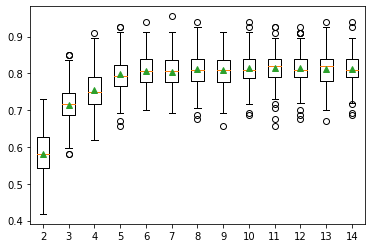

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator=RandomForestClassifier(criterion='entropy'), n_features_to_select=i)
		model = RandomForestClassifier(criterion='entropy')
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###XGBOOST

In [ ]:
XGB = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
XGB.fit(X_train, Y_train, verbose=False)
XGBPred = XGB.predict(X_test)
XGB.fit(X_test, Y_test, verbose=False)
#XGB.score(X_test, Y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.08, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=1)

In [ ]:
cm = confusion_matrix(Y_test, XGBPred)
print(cm)

[[22 16]
 [14 71]]


In [ ]:
accuracy = accuracy_score(Y_test, XGBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, XGBPred))

Accuracy: 75.61%
              precision    recall  f1-score   support

           0       0.61      0.58      0.59        38
           1       0.82      0.84      0.83        85

    accuracy                           0.76       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.75      0.76      0.75       123



In [ ]:
#XGBPred = XGB.predict(XTest)
#EVALUATION['XGB'] = list(XGBPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator= XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75), n_features_to_select=5)
model = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.823 (0.044)


In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

0.7479674796747967


>2 : Features :: Accuracy : 0.795 (Time : 0.044)
>3 : Features :: Accuracy : 0.825 (Time : 0.043)
>4 : Features :: Accuracy : 0.817 (Time : 0.047)
>5 : Features :: Accuracy : 0.819 (Time : 0.043)
>6 : Features :: Accuracy : 0.816 (Time : 0.042)
>7 : Features :: Accuracy : 0.815 (Time : 0.046)
>8 : Features :: Accuracy : 0.811 (Time : 0.045)
>9 : Features :: Accuracy : 0.813 (Time : 0.043)
>10 : Features :: Accuracy : 0.807 (Time : 0.046)
>11 : Features :: Accuracy : 0.806 (Time : 0.045)
>12 : Features :: Accuracy : 0.806 (Time : 0.045)
>13 : Features :: Accuracy : 0.806 (Time : 0.045)
>14 : Features :: Accuracy : 0.806 (Time : 0.045)


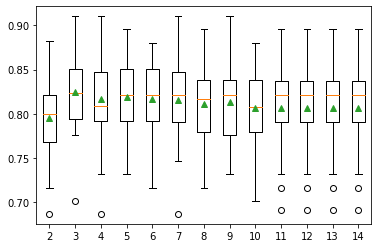

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator= XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75), n_features_to_select=i)
		model = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###ADABOOST

In [ ]:
ADAB = AdaBoostClassifier()
ADAB.fit(X_train, Y_train)
ADABPred = ADAB.predict(X_test)
ADAB.fit(X_test, Y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
cm = confusion_matrix(Y_test, ADABPred)
print(cm)

[[19 19]
 [17 68]]


In [ ]:
accuracy = accuracy_score(Y_test, ADABPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, ADABPred))

Accuracy: 70.73%
              precision    recall  f1-score   support

           0       0.53      0.50      0.51        38
           1       0.78      0.80      0.79        85

    accuracy                           0.71       123
   macro avg       0.65      0.65      0.65       123
weighted avg       0.70      0.71      0.71       123



In [ ]:
ADABPred = ADAB.predict(XTest)

ACCURACY['ADB'] = accuracy
EVALUATION['ADB'] = list(ADABPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator=AdaBoostClassifier(), n_features_to_select=5)
model = AdaBoostClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.719 (0.068)


In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

0.5934959349593496


>2 : Features :: Accuracy : 0.672 (Time : 0.054)
>3 : Features :: Accuracy : 0.692 (Time : 0.057)
>4 : Features :: Accuracy : 0.703 (Time : 0.060)
>5 : Features :: Accuracy : 0.719 (Time : 0.068)
>6 : Features :: Accuracy : 0.737 (Time : 0.061)
>7 : Features :: Accuracy : 0.748 (Time : 0.062)
>8 : Features :: Accuracy : 0.766 (Time : 0.059)
>9 : Features :: Accuracy : 0.778 (Time : 0.059)
>10 : Features :: Accuracy : 0.790 (Time : 0.048)
>11 : Features :: Accuracy : 0.797 (Time : 0.046)
>12 : Features :: Accuracy : 0.797 (Time : 0.046)
>13 : Features :: Accuracy : 0.797 (Time : 0.046)
>14 : Features :: Accuracy : 0.797 (Time : 0.046)


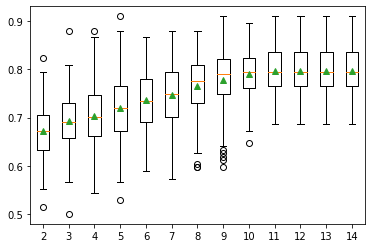

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator= AdaBoostClassifier(), n_features_to_select=i)
		model = AdaBoostClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###CATBOOST

In [ ]:
CDAB = CatBoostClassifier()
CDAB.fit(X_train, Y_train)
CDABPred = ADAB.predict(X_test)
CDAB.fit(X_test, Y_test)

Learning rate set to 0.008705
0:	learn: 0.6887419	total: 4.21ms	remaining: 4.21s
1:	learn: 0.6843649	total: 6.53ms	remaining: 3.26s
2:	learn: 0.6801602	total: 8.84ms	remaining: 2.94s
3:	learn: 0.6766380	total: 11.2ms	remaining: 2.78s
4:	learn: 0.6719139	total: 13.4ms	remaining: 2.66s
5:	learn: 0.6679100	total: 15.7ms	remaining: 2.6s
6:	learn: 0.6642692	total: 17.8ms	remaining: 2.52s
7:	learn: 0.6603682	total: 20ms	remaining: 2.48s
8:	learn: 0.6566117	total: 22.1ms	remaining: 2.44s
9:	learn: 0.6524008	total: 24.3ms	remaining: 2.41s
10:	learn: 0.6486692	total: 26.5ms	remaining: 2.38s
11:	learn: 0.6452454	total: 28.7ms	remaining: 2.37s
12:	learn: 0.6420320	total: 31ms	remaining: 2.35s
13:	learn: 0.6380966	total: 33.3ms	remaining: 2.35s
14:	learn: 0.6344448	total: 35.5ms	remaining: 2.33s
15:	learn: 0.6309943	total: 37.8ms	remaining: 2.32s
16:	learn: 0.6277259	total: 40.1ms	remaining: 2.32s
17:	learn: 0.6242196	total: 42.3ms	remaining: 2.31s
18:	learn: 0.6205520	total: 44.6ms	remaining: 2.3

In [ ]:
cm = confusion_matrix(Y_test, CDABPred)
print(cm)

[[28 10]
 [ 3 82]]


In [ ]:
accuracy = accuracy_score(Y_test, CDABPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, CDABPred))

Accuracy: 89.43%
              precision    recall  f1-score   support

           0       0.90      0.74      0.81        38
           1       0.89      0.96      0.93        85

    accuracy                           0.89       123
   macro avg       0.90      0.85      0.87       123
weighted avg       0.89      0.89      0.89       123



In [ ]:
CDABPred = CDAB.predict(XTest)

ACCURACY['CATB'] = accuracy
EVALUATION['CATB'] = list(CDABPred)

#EVALUATION

In [ ]:
EVALUATION = pd.DataFrame(EVALUATION)

,SVM,LinearSVC,CaliberatedVC,NB,DT,Bagging,ExtraTree,GB,SGDC,SGD,RF,ADB,CATB
0,1,1,1,1,1,1,1,1,0,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,1,0,1,1,0,0,1,0,1,0,0
4,0,1,1,1,0,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,1,1,1,1,1,0,1,0,1,1,1
363,1,1,1,1,1,1,1,1,1,1,1,1,1
364,0,0,1,0,0,0,0,0,1,1,0,0,0
365,1,1,1,1,1,1,1,0,1,1,1,1,1


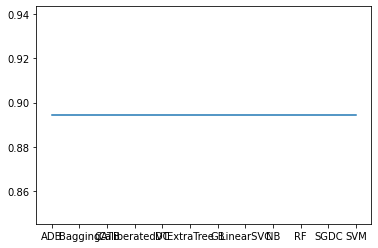